In [1]:
from jupyterthemes import jtplot
import script.DHOV as dhov
from script.Networks import SequentialNN
import torch
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset
from script.DHOV import plot_2d
from script.trainFunction import train_sequential_2
from script.dataInit import Rhombus
import matplotlib.pyplot as plt
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

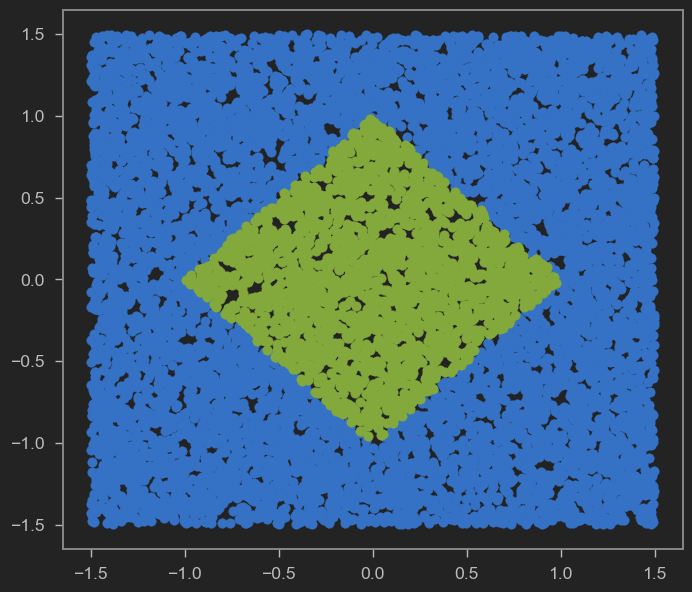

In [6]:
batch_size = 1
epochs = 7
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range,
                                                              y_range)  # samples will be split in inside and outside the rhombus
plt.scatter(list(map(lambda x: x[0], ambient_space)), list(map(lambda x: x[1], ambient_space)))
plt.scatter(list(map(lambda x: x[0], included_space)), list(map(lambda x: x[1], included_space)))
plt.show()




In [7]:
true_extremal_points = Rhombus().get_extremal_points()
dataset_in = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset_in, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data=ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

nn = SequentialNN([2, 2, 2])


In [9]:
import matplotlib

train_sequential_2(nn, train_loader, ambient_loader, epochs=epochs)
matplotlib.use('TkAgg')
plot_2d(nn, included_space, ambient_space)



=== Epoch: 0===
batch = 0, mean loss = 6.285898024029925e-06
batch = 100, mean loss = 4.117533195649297e-06
batch = 200, mean loss = 3.2280991440294817e-06
batch = 300, mean loss = 2.6468923087016983e-06
batch = 400, mean loss = 2.235804952215646e-06
batch = 500, mean loss = 1.9445763386640966e-06
batch = 600, mean loss = 1.7198607674100937e-06
batch = 700, mean loss = 1.5411603502334458e-06
batch = 800, mean loss = 1.3963130236673747e-06
batch = 900, mean loss = 1.277372327218773e-06
batch = 1000, mean loss = 1.176731667526613e-06
batch = 1100, mean loss = 1.09126695765468e-06
batch = 1200, mean loss = 1.017405403707285e-06
batch = 1300, mean loss = 9.525824121175755e-07
batch = 1400, mean loss = 8.955615013664457e-07
batch = 1500, mean loss = 8.452661921463813e-07
batch = 1600, mean loss = 7.99981723654548e-07
batch = 1700, mean loss = 7.594895859034107e-07
batch = 1800, mean loss = 7.227681402877277e-07
batch = 1900, mean loss = 6.893635577596655e-07
batch = 2000, mean loss = 6.5885

In [5]:
torch.set_default_dtype(torch.float64)
test_input = dataset_in.__getitem__(0)
test_input = torch.tensor([[0,0]], dtype=torch.float64)